# Installation et importation de pandas
En principe pandas est préinstallé avec la distribution Anconda.
au cas où, il surfit d'exécuter la commande suivante:
```
conda install pandas
```
OU
```
pip install pandas
```
 ou si vous etes sur jupyter ou colab
```
!pip install pandas
```

## Pour l'importation
```
import pandas as pd
```

In [3]:
import pandas as pd

## Modules Associés:
numpy est souvent assoicié à l'utilisation de pandas (matplotlib aussi)


In [6]:
import numpy as np

#Series et DataFrame en Pandas
Les Series, essentiellement des colonnes, les DataFrame<del> s </del> un tableau bidimensionnel (en principe un DataFrame est une collection de Series, mais pas que)

## Création Series

In [10]:
first_series = pd.Series([1,3.0,5,np.nan,"hello"])
#juste des colonnes
#un dataframe est un ensemble de colonnes

In [12]:
print(first_series)

0        1
1      3.0
2        5
3      NaN
4    hello
dtype: object


In [18]:
second_series = pd.Series(np.array([3]*4), dtype = 'int32')
print(second_series)

0    3
1    3
2    3
3    3
dtype: int32


In [22]:
date_series = pd.date_range('20240604',periods=7)#création de date avec un périod de 7 donc range de 7j
print(type(date_series))
print(date_series)
#Nous n'avons pour l'instant pas une série mais un dateTimeIndex

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07',
               '2024-06-08', '2024-06-09', '2024-06-10'],
              dtype='datetime64[ns]', freq='D')


In [24]:
date_series = pd.Series(date_series)
print(date_series)
type(date_series)
#On a maintenant date_series qui est une série

0   2024-06-04
1   2024-06-05
2   2024-06-06
3   2024-06-07
4   2024-06-08
5   2024-06-09
6   2024-06-10
dtype: datetime64[ns]


pandas.core.series.Series

## Creation DataFrame
### A partir d'un dict

In [24]:
my_dict = {'apples':[1,2,3,4],'oranges':[5,6,7,8]}
#key--> nom col
#value --> val de la col
print(my_dict)
print(type(my_dict))

{'apples': [1, 2, 3, 4], 'oranges': [5, 6, 7, 8]}
<class 'dict'>


In [30]:
first_df = pd.DataFrame(my_dict)#transformation de n'importe quel truc en dataframe
first_df

,apples,oranges
0,1,5
1,2,6
2,3,7
3,4,8


In [32]:
print(type(first_df))

<class 'pandas.core.frame.DataFrame'>


Observant l'index (il est généré par défaut)


In [43]:
first_df.index #donne les index de début de fin et l'écart entre

RangeIndex(start=0, stop=4, step=1)

Changeons l'index:

In [67]:
new_index = ["a", "b", "c","d"]


In [69]:
indexed_first_df = pd.DataFrame(my_dict,index=new_index) #changer les noms des lignes(index) avec le tableau que nous voulons

In [71]:
indexed_first_df

,apples,oranges
a,1,5
b,2,6
c,3,7
d,4,8


In [73]:
indexed_first_df.index #si c'est un tableau affiche le tableau des index donnés

Index(['a', 'b', 'c', 'd'], dtype='object')

In [75]:
indexed_first_df = pd.DataFrame(my_dict,index=['yaye','marc','giouli','onze'])

In [77]:
indexed_first_df

,apples,oranges
yaye,1,5
marc,2,6
giouli,3,7
onze,4,8


In [49]:
indexed_first_df.index

Index(['yaye', 'marc', 'giouli', 'onze'], dtype='object')

### Autres  exemples de création DataFrame

In [87]:
second_df = pd.DataFrame(np.random.randn(7,4), index = date_series, columns = ['c1','c2','c3','c4'])
#création du dataframe comme on veut en changeant les index les colonnes et autre
second_df

,c1,c2,c3,c4
2024-06-04,0.209579,-1.084600,-1.905286,0.099151
2024-06-05,1.604185,0.114647,-0.047374,-2.613561
2024-06-06,0.303666,-0.112011,0.404881,-0.934158
2024-06-07,-0.554203,-0.185284,-0.084371,0.900436
2024-06-08,-1.293113,-1.308075,-1.550102,-0.187390
2024-06-09,-0.072961,0.635178,0.145280,-0.425629
2024-06-10,0.036858,1.539841,0.426546,1.057134


In [103]:
third_df = pd.DataFrame(
{
    "A":1.0,
    "B": pd.Timestamp("20240604"),
    "C": pd.Series(1, index=list(range(4)),dtype="float32"),
    "D": np.array([3]*4, dtype='int32'),
    "E": pd.Categorical(["test","train","test","train"]),
    "F":"foo"
}
)

In [105]:
third_df

,A,B,C,D,E,F
0,1.0,2024-06-04,1.0,3,test,foo
1,1.0,2024-06-04,1.0,3,train,foo
2,1.0,2024-06-04,1.0,3,test,foo
3,1.0,2024-06-04,1.0,3,train,foo


In [111]:
#Select column B version loser
third_df["B"]

0   2024-06-04
1   2024-06-04
2   2024-06-04
3   2024-06-04
Name: B, dtype: datetime64[s]

In [118]:
#Select column B version boss
third_df.B

0   2024-06-04
1   2024-06-04
2   2024-06-04
3   2024-06-04
Name: B, dtype: datetime64[s]

# Importer et exporter des donnees
## à partir de csv
```
df = pd.read_csv('Nom_ou_URL_duFichierCsv')
```
## A partir de json
```
df = pd.read_json('Nom_ou_URL_duFichierjson')
```
## A partir d'excel
```
df = pd.to_excel('Nom_ou_URL_duFichierxlsx", sheet_name="Sheet1")
```
## A partir sqlite 
```
import sqlite3
con = sqlite3.connect("database.db")
df = pd.read_sql_query("SELECT * FROM nameTable", con)
df
```

**Bien évidement  la demarche inverse est possible grace à :**

```
df.to_csv('new_Nom_ou_URL_duFichierCsv')

df.to_json('Nom_ou_URL_duFichierjson')

df.to_sql('new_Name_of_SQL_table', con)
```

# Explorer les données

In [122]:
second_df

,c1,c2,c3,c4
2024-06-04,0.209579,-1.084600,-1.905286,0.099151
2024-06-05,1.604185,0.114647,-0.047374,-2.613561
2024-06-06,0.303666,-0.112011,0.404881,-0.934158
2024-06-07,-0.554203,-0.185284,-0.084371,0.900436
2024-06-08,-1.293113,-1.308075,-1.550102,-0.187390
2024-06-09,-0.072961,0.635178,0.145280,-0.425629
2024-06-10,0.036858,1.539841,0.426546,1.057134


In [124]:
second_df.head(2)#choper les premiers

,c1,c2,c3,c4
2024-06-04,0.209579,-1.084600,-1.905286,0.099151
2024-06-05,1.604185,0.114647,-0.047374,-2.613561


In [130]:
second_df.tail(2)#choper les derniers

,c1,c2,c3,c4
2024-06-09,-0.072961,0.635178,0.145280,-0.425629
2024-06-10,0.036858,1.539841,0.426546,1.057134


In [132]:
second_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2024-06-04 to 2024-06-10
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      7 non-null      float64
 1   c2      7 non-null      float64
 2   c3      7 non-null      float64
 3   c4      7 non-null      float64
dtypes: float64(4)
memory usage: 280.0 bytes


In [134]:
second_df.shape

(7, 4)

Affichage index

In [137]:
second_df.index

DatetimeIndex(['2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07',
               '2024-06-08', '2024-06-09', '2024-06-10'],
              dtype='datetime64[ns]', freq='D')

Affichage colonnes

In [140]:
second_df.columns

Index(['c1', 'c2', 'c3', 'c4'], dtype='object')

In [142]:
second_df.describe()

,c1,c2,c3,c4
count,7.000000,7.000000,7.000000,7.000000
mean,0.033430,-0.057186,-0.372918,-0.300574
std,0.883901,0.974603,0.951822,1.239984
min,-1.293113,-1.308075,-1.905286,-2.613561
25%,-0.313582,-0.634942,-0.817236,-0.679894
50%,0.036858,-0.112011,-0.047374,-0.187390
75%,0.256623,0.374912,0.275081,0.499793
max,1.604185,1.539841,0.426546,1.057134


Stat Rapide

In [144]:
second_df.mean()

c1    0.033430
c2   -0.057186
c3   -0.372918
c4   -0.300574
dtype: float64

voir aussi mean(), mean(1), max...

#### Transposé des données

In [148]:
second_df_t = second_df.transpose()#on peut aussi juste faire .T
second_df_t

,2024-06-04,2024-06-05,2024-06-06,2024-06-07,2024-06-08,2024-06-09,2024-06-10
c1,0.209579,1.604185,0.303666,-0.554203,-1.293113,-0.072961,0.036858
c2,-1.084600,0.114647,-0.112011,-0.185284,-1.308075,0.635178,1.539841
c3,-1.905286,-0.047374,0.404881,-0.084371,-1.550102,0.145280,0.426546
c4,0.099151,-2.613561,-0.934158,0.900436,-0.187390,-0.425629,1.057134


## Acces et selection

In [5]:
df=pd.read_csv("http://chendeb.free.fr/iris.data", names=["sepal_length","sepal_width","petal_length", "petal_width", "label"])

NameError: name 'pd' is not defined

### Selection d'une colonne

In [3]:
df["sepal_length"]

NameError: name 'df' is not defined

### Selection de lignes par slicing

In [157]:
df[3:5]

,sepal_length,sepal_width,petal_length,petal_width,label
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Selection par label

In [162]:
df.loc[:,"sepal_length"]
#df.iloc[0]
#loc pour choper ce que l'on veut genre ligne / colonne / par nom de ligne / colonne

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [164]:
df.loc[0,"sepal_length"]

5.1

In [166]:
df.loc[0]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
label           Iris-setosa
Name: 0, dtype: object

### Selection multi axes

In [169]:
df.loc[1,"sepal_length"]

4.9

In [171]:
df.loc[0:4,"sepal_length":"petal_width"]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [175]:
df.loc[0:4,["sepal_length","sepal_length"]]

,sepal_length,sepal_length
0,5.1,5.1
1,4.9,4.9
2,4.7,4.7
3,4.6,4.6
4,5.0,5.0


### Selection par position

In [178]:
df.iloc[1]

sepal_length            4.9
sepal_width             3.0
petal_length            1.4
petal_width             0.2
label           Iris-setosa
Name: 1, dtype: object

Slicing comme numpy/Python

In [181]:
df.iloc[[1,3,6],[0,2]]
#ligne 1 3 6 pour colonne 0 et 2

,sepal_length,petal_length
1,4.9,1.4
3,4.6,1.5
6,4.6,1.4


In [183]:
df.iloc[0:6,:]
#premier temps c'est les lignes et après c'est les colonnes 

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [185]:
df.iloc[1,1]

3.0

### Boolean indexing


In [188]:
df[df["sepal_length"]>6]
#Selection des lignes où sepal_legnth est supérieur à 6 --> + nb de colonne prise indiqué en bas

,sepal_length,sepal_width,petal_length,petal_width,label
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [125]:
df[df["petal_width"]>0.2]

,sepal_length,sepal_width,petal_length,petal_width,label
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Données manquantes

In [128]:
df_missingdata=second_df[second_df>0]
df_missingdata

,c1,c2,c3,c4
2024-06-04,0.861828,NaN,1.378329,NaN
2024-06-05,NaN,NaN,0.996414,0.374297
2024-06-06,0.304581,NaN,NaN,NaN
2024-06-07,0.294135,NaN,NaN,NaN
2024-06-08,NaN,NaN,NaN,NaN
2024-06-09,NaN,0.502517,2.466112,NaN
2024-06-10,NaN,NaN,NaN,0.106819


In [130]:
df_missingdata.dropna(how="any")

,c1,c2,c3,c4


In [132]:
df_missingdata.isna()
#savoir si il y a des valeurs dans les cases --> 

,c1,c2,c3,c4
2024-06-04,False,True,False,True
2024-06-05,True,True,False,False
2024-06-06,False,True,True,True
2024-06-07,False,True,True,True
2024-06-08,True,True,True,True
2024-06-09,True,False,False,True
2024-06-10,True,True,True,False


### Tri selon l'index

In [196]:
df.sort_index(axis=0,ascending=False)
#ascending (ordre croissant)

,sepal_length,sepal_width,petal_length,petal_width,label
149,5.9,3.0,5.1,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


### Tri selon les données

In [138]:
df.sort_values(by="petal_length",ascending=True)


,sepal_length,sepal_width,petal_length,petal_width,label
22,4.6,3.6,1.0,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica


In [140]:
df.sort_values(by=["petal_length","petal_width"],ascending=[True,True])

,sepal_length,sepal_width,petal_length,petal_width,label
22,4.6,3.6,1.0,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


In [142]:
df.sort_values(by=["petal_length","petal_width"],ascending=[True,True]).head(2)

,sepal_length,sepal_width,petal_length,petal_width,label
22,4.6,3.6,1.0,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa


## Enlever les redondances

In [200]:
alternative=pd.concat([df,df],axis=0)
alternative=pd.concat([df,df],axis=0).reset_index(drop=True)
#drop = True ca ne change pas le nom des lignes (numéros notament) 
alternative

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
295,6.7,3.0,5.2,2.3,Iris-virginica
296,6.3,2.5,5.0,1.9,Iris-virginica
297,6.5,3.0,5.2,2.0,Iris-virginica
298,6.2,3.4,5.4,2.3,Iris-virginica


In [202]:
reduced_df=alternative.drop_duplicates()
reduced_df
#keep = first --> garde le 1er de la redondance
#keep = last --> garde le dernier de la redondance

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [149]:
reduced_df=alternative.drop_duplicates(keep="first")
reduced_df=alternative.drop_duplicates(keep="last")
reduced_df

,sepal_length,sepal_width,petal_length,petal_width,label
150,5.1,3.5,1.4,0.2,Iris-setosa
151,4.9,3.0,1.4,0.2,Iris-setosa
152,4.7,3.2,1.3,0.2,Iris-setosa
153,4.6,3.1,1.5,0.2,Iris-setosa
154,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
295,6.7,3.0,5.2,2.3,Iris-virginica
296,6.3,2.5,5.0,1.9,Iris-virginica
297,6.5,3.0,5.2,2.0,Iris-virginica
298,6.2,3.4,5.4,2.3,Iris-virginica


### **inplace** keyword argument  et **keep**


In [152]:
alternative.drop_duplicates(keep="last",inplace=True)
#inplace --> sauvegarde sur le fichier actuel
alternative

,sepal_length,sepal_width,petal_length,petal_width,label
150,5.1,3.5,1.4,0.2,Iris-setosa
151,4.9,3.0,1.4,0.2,Iris-setosa
152,4.7,3.2,1.3,0.2,Iris-setosa
153,4.6,3.1,1.5,0.2,Iris-setosa
154,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
295,6.7,3.0,5.2,2.3,Iris-virginica
296,6.3,2.5,5.0,1.9,Iris-virginica
297,6.5,3.0,5.2,2.0,Iris-virginica
298,6.2,3.4,5.4,2.3,Iris-virginica


## groupby

## value_counts

## Creez nouvelle colonne

In [163]:
df[["nouvelle"]]=1

In [165]:
newcols={"sepal_length":"sl"}
#key --> ancien nom
#value --> nouvelle valeur de la colonne
df.rename(columns=newcols, inplace=True)
df.head()

,sl,sepal_width,petal_length,petal_width,label,nouvelle
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [167]:
newcols={"sepal_length":"sl","sepal_width":"sw","label":"lab"}
df.rename(columns=newcols, inplace=True)
df.head()

,sl,sw,petal_length,petal_width,lab,nouvelle
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


créer les colonnes


In [170]:
df["petal"]=(df['sl']+df['sw'])/2
df.head()

,sl,sw,petal_length,petal_width,lab,nouvelle,petal
0,5.1,3.5,1.4,0.2,Iris-setosa,1,4.30
1,4.9,3.0,1.4,0.2,Iris-setosa,1,3.95
2,4.7,3.2,1.3,0.2,Iris-setosa,1,3.95
3,4.6,3.1,1.5,0.2,Iris-setosa,1,3.85
4,5.0,3.6,1.4,0.2,Iris-setosa,1,4.30


In [172]:
df["petal"].mean()

4.448666666666667

In [174]:
df["petal"].sum()

667.3000000000001

In [176]:
df["petal"].min()

3.4

# Plot

In [179]:
import matplotlib.pyplot as plt

In [194]:
df=pd.read_csv("http://chendeb.free.fr/iris.data", names=["pl","pw", "sl", "sw", "label"])


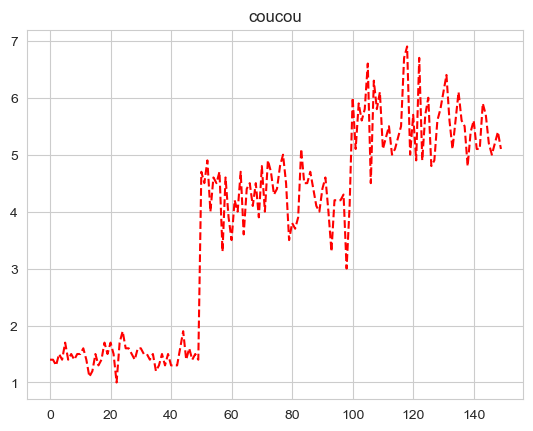

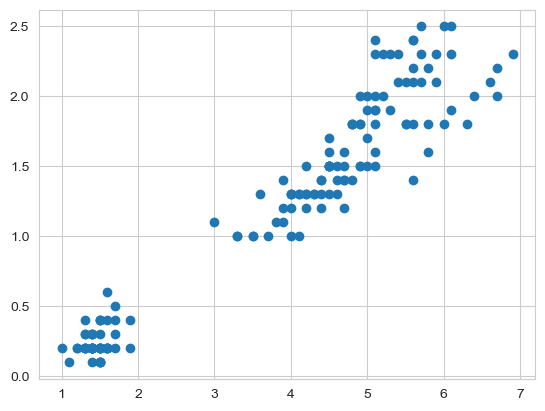

In [200]:
plt.plot(df.index, df["sl"], "r--")
plt.title("coucou")
plt.show()
plt.scatter(df["sl"],df["sw"])
plt.show()

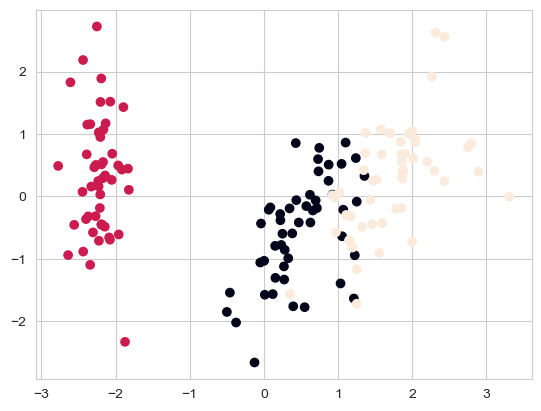

In [227]:
df=pd.read_csv("http://chendeb.free.fr/iris.data", names=["sl","sw", "pl", "pw", "label"])
df['label'].replace(
{
    "Iris-versicolor":0,
    "Iris-setosa":1,
    "Iris-virginica":2
}, inplace=True
)
df.head()
data=df[["pl","pw", "sl", "sw"]]
data.head()
from sklearn.preprocessing import StandardScaler
normalized_data=StandardScaler().fit_transform(data)
normalized_data[:5,:]

from sklearn.decomposition import PCA
model=PCA(2)
model.fit(normalized_data)
projectedData=model.transform(normalized_data)
import matplotlib.pyplot as plt
plt.scatter(projectedData[:,0],projectedData[:,1], c=df["label"])

Plotting using Seaborn

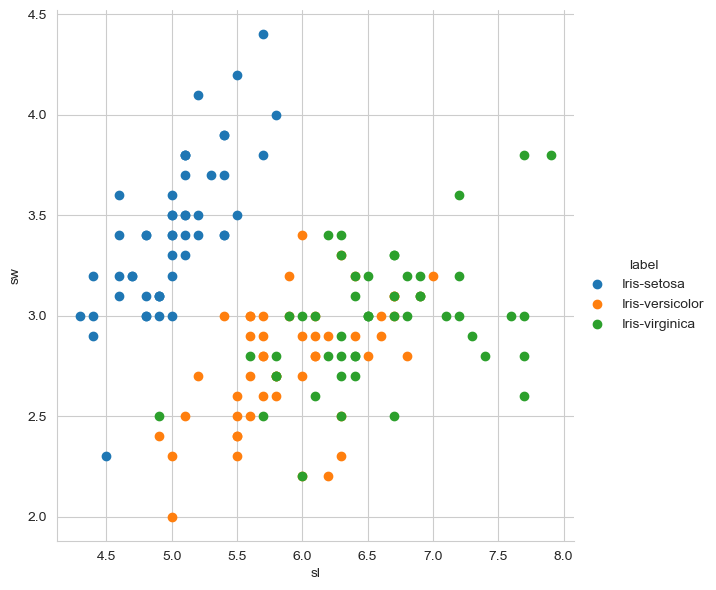

In [321]:
import seaborn as sns

df=pd.read_csv("http://chendeb.free.fr/iris.data", names=["sl","sw", "pl", "pw", "label"])

# style used as a theme of graph
# for example if we want black
# graph with grid then write "darkgrid"
sns.set_style("whitegrid")

# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(df, hue ="label",height = 6).map(plt.scatter,'sl','sw').add_legend()



<Axes: xlabel='label', ylabel='pl'>

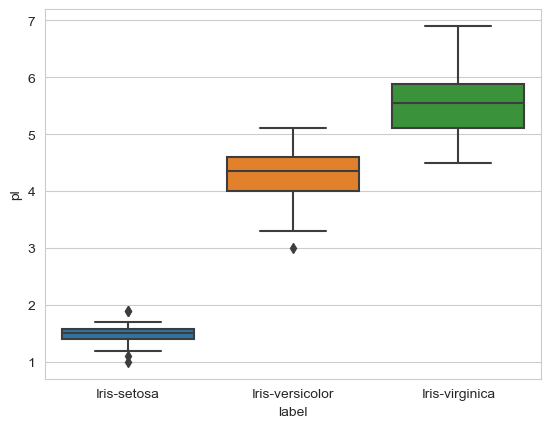

In [269]:
sns.boxplot(data=df, x="label",y="pl")

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='sl'>

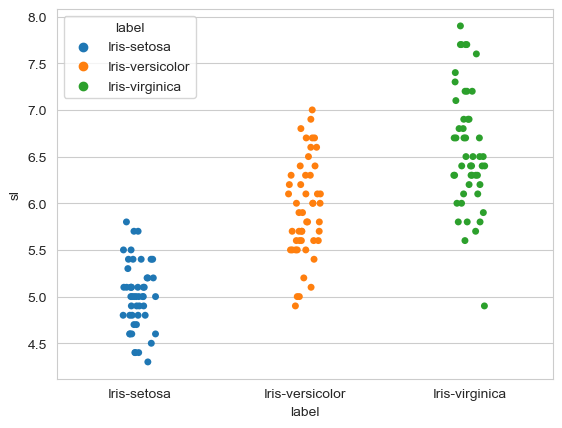

In [275]:
sns.stripplot(data=df, x="label",y="sl", hue="label")

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

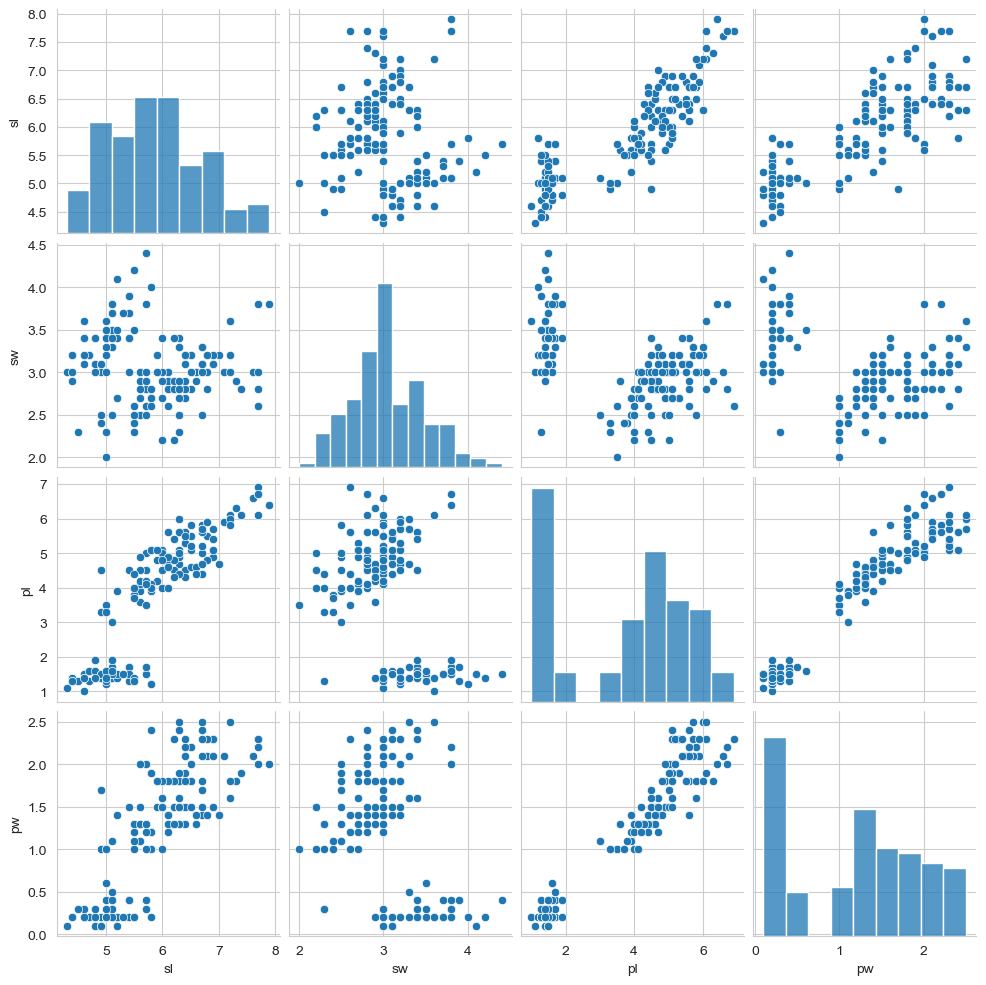

In [277]:
sns.pairplot(df)

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

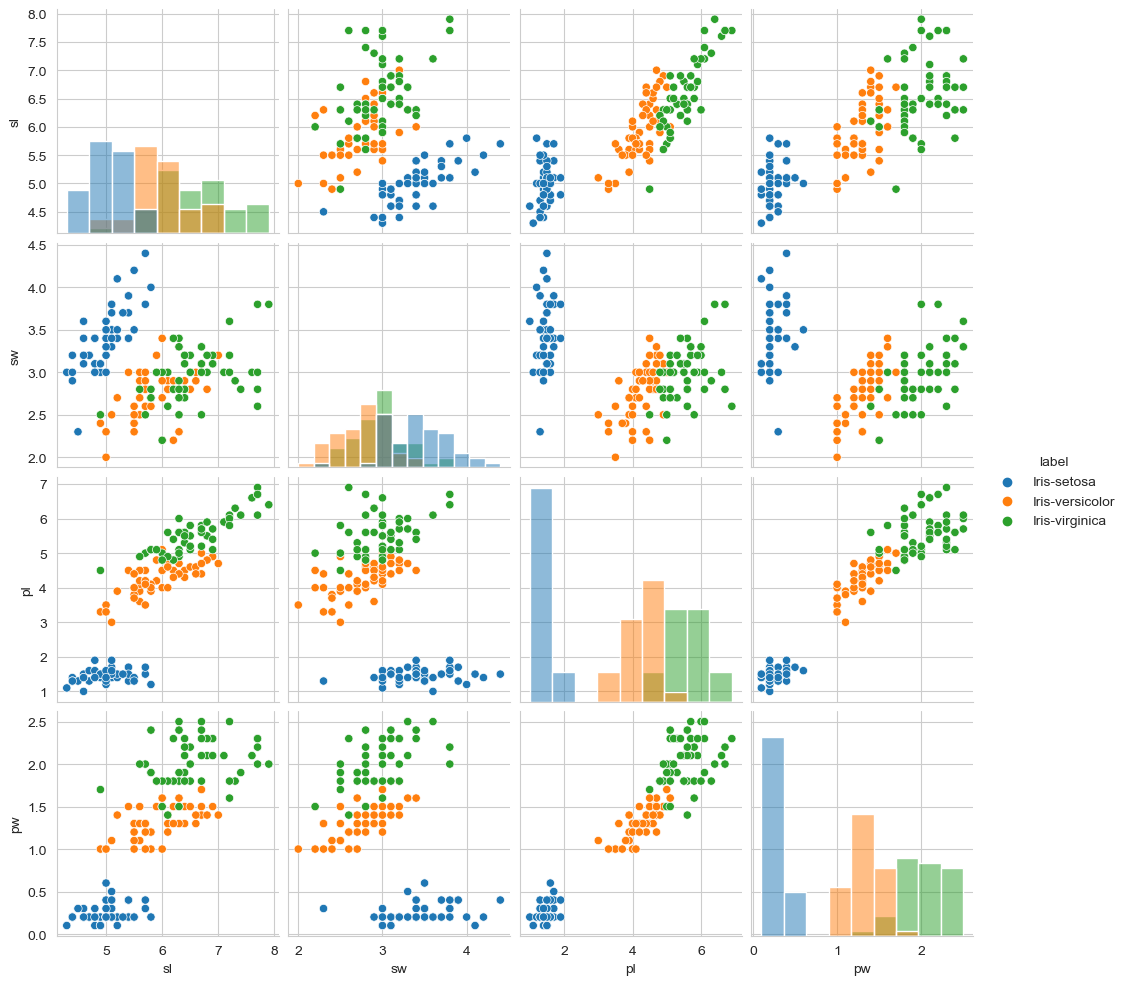

In [281]:
sns.pairplot(df,hue="label",diag_kind="hist")

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

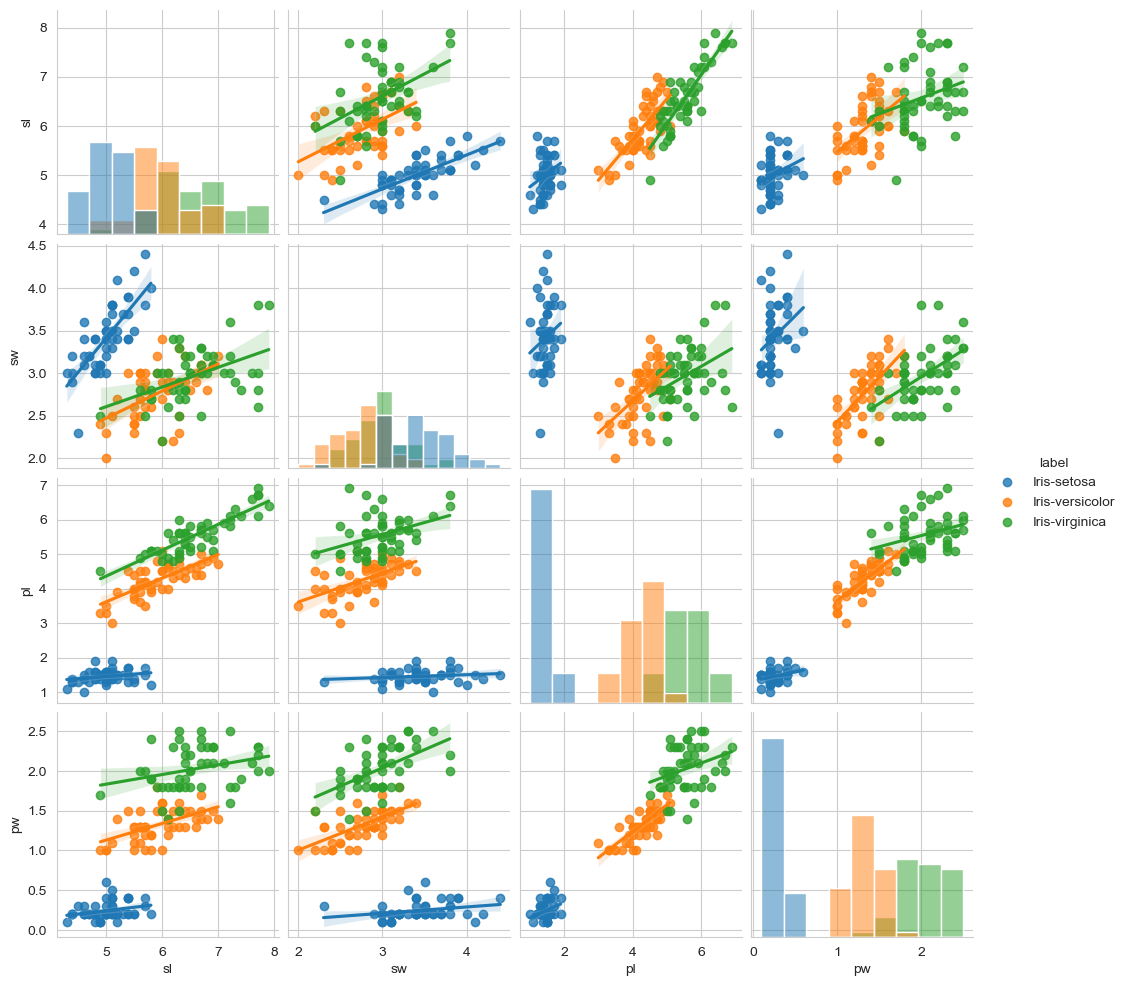

In [291]:
sns.pairplot(df,hue="label", kind="reg", diag_kind="hist")

<Axes: >

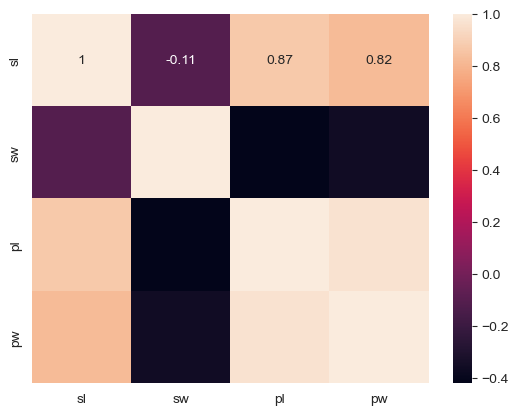

In [323]:
copi=df.drop(columns=["label"])
sns.heatmap(copi.corr(),annot=True)

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

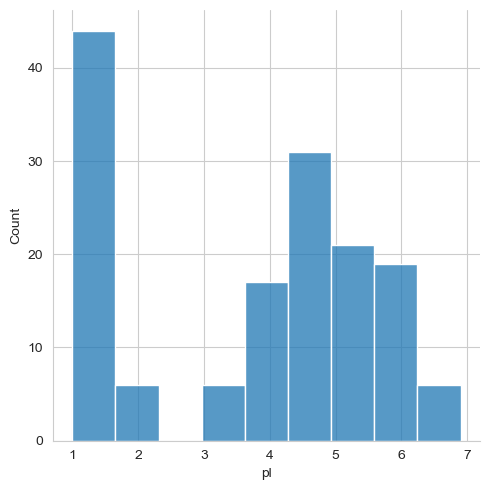

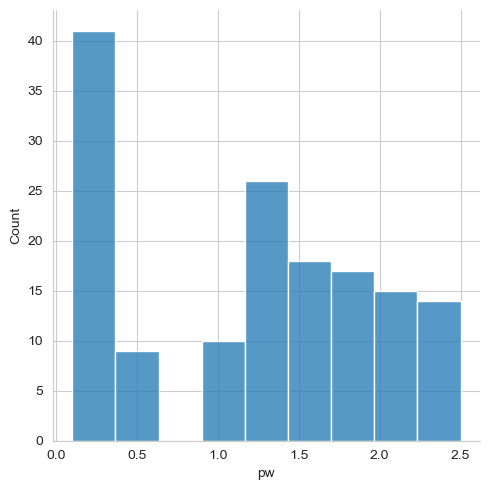

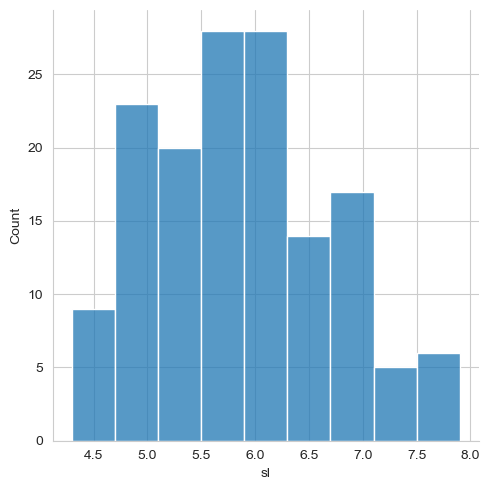

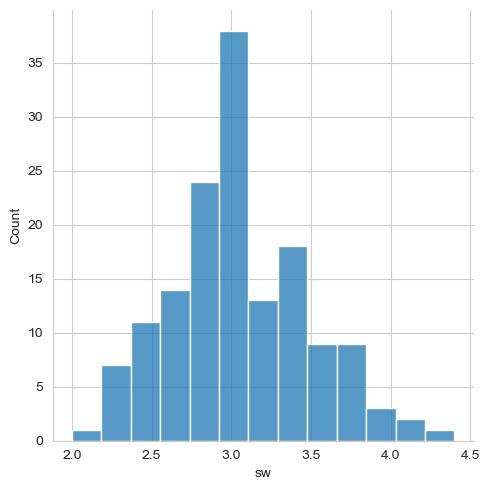

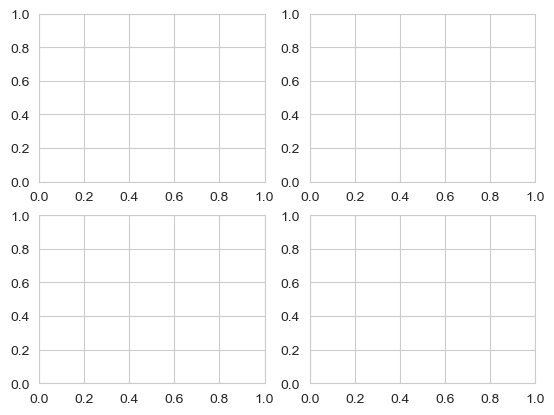

In [398]:

axes[0, 0]=sns.displot(df, kind = "hist", x='pl')
axes[0, 1]=sns.displot(df, kind = "hist", x='pw')
axes[1, 0]=sns.displot(df, kind = "hist", x='sl')
axes[1, 1]=sns.displot(df, kind = "hist", x='sw')
fig, axes = plt.subplots(2, 2)


In [370]:
from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]
p = figure(title="Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'
p.scatter(flowers["petal_length"], flowers["petal_width"],
color=colors, fill_alpha=0.2, size=10)
show(p)